In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

In [56]:
data = pd.DataFrame(data)

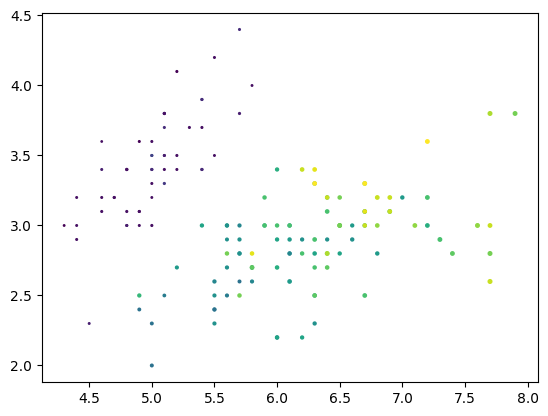

In [57]:
plt.scatter(data[0], data[1], data[2], data[3])

In [58]:
data[0] -= data[0].mean()
data[1] -= data[1].mean()
data[2] -= data[2].mean()
data[3] -= data[3].mean()

In [63]:
cov_mat = np.cov(data, rowvar=False)

In [67]:
eigenvalues, eigenvector = np.linalg.eig(cov_mat)

In [72]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvector = eigenvector[:, sorted_indices]

In [74]:
principal_component = np.dot(data, eigenvector)

In [77]:
principal_component = pd.DataFrame(principal_component)

In [82]:
print(principal_component[0].var(), principal_component[1].var(), principal_component[2].var(), principal_component[3].var())

4.228241706034864 0.2426707479286335 0.07820950004291936 0.023835092973449427


[-0.64278761  0.76604444] [0.76604444 0.64278761]


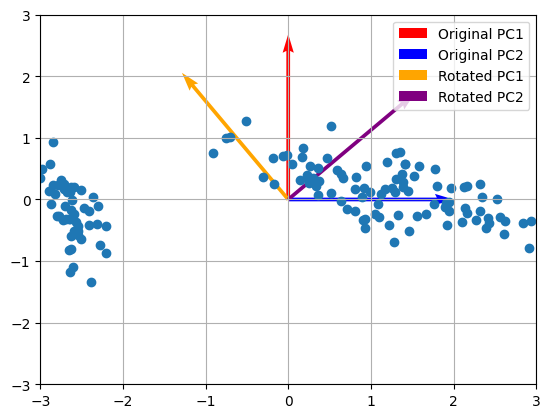

In [89]:
pcaarr = np.array(principal_component)

u = np.array([0, 1])
v = np.array([1, 0])

angle = 40
theta = np.radians(angle)

rotation = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

rotated_u = rotation @ u
rotated_v = rotation @ v

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.quiver(0, 0, u[0], u[1], color='r', label='Original PC1', scale=3)
plt.quiver(0, 0, v[0], v[1], color='b', label='Original PC2', scale=3)
plt.quiver(0, 0, rotated_u[0], rotated_u[1], color='orange', label='Rotated PC1', scale=3)
plt.quiver(0, 0, rotated_v[0], rotated_v[1], color='purple', label='Rotated PC2', scale=3)

plt.scatter(pcaarr[:, 0], pcaarr[:, 1])
plt.grid()
plt.legend()

print(rotated_u, rotated_v)